In [1]:
import pandas as pd

## Задачи

Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.
Какой клиент совершил больше всего успешных операций? (success == True)
С какой платформы осуществляется наибольшее количество успешных операций?
Какую платформу предпочитают премиальные клиенты?
Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)
Постройте график распределения числа успешных операций
Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?
 

Описание данных
u*ser_data:

client – идентификатор пользователя
premium – является ли клиент премиальным
age – возраст
logs:

client – идентификатор пользователя
success – результат (успех – 1, нет – 0)
platform – платформа
time – время в формате Unixу?

Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику. 
Вопрос: Сколько уникальных значений принимает переменная platform?

In [2]:
user_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv', sep=',')
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [3]:
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv', sep=',')
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [4]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [5]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [6]:
user_data.shape

(2954, 3)

In [7]:
logs.shape

(4500, 4)

In [8]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [9]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [10]:
# method info()

platform = logs['platform'].nunique()
platform


3

Какой клиент совершил больше всего успешных операций?
Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания. Например:

In [11]:
succ_max_bookings = logs\
    .query('success == True')\
    .groupby('client', as_index=False)\
    .agg({'success':'sum'}, ascending = False)\
    .sort_values('success', ascending=False)\
    .query('success>=41')
# succ_max_bookings = logs.loc[logs.success == True].client.value_counts()
# succ_max_bookings

In [12]:
succ_max_bookings.client.sort_values()

332     12179
810     28719
1020    36165
1487    52870
1758    61468
1759    61473
2231    78349
2345    82563
2626    92584
Name: client, dtype: int64

С какой платформы было совершено наибольшее количество успешных операций?

In [13]:
# succ_platform = logs.query('success == True').groupby('platform', as_index=False).agg({'success':'sum'}, ascending = False)

logs.loc[logs.success == True].platform.value_counts().idxmax()

'phone'

In [14]:
logs.loc[logs.success == True].platform.value_counts()

platform
phone       2019
computer    1090
tablet       180
Name: count, dtype: int64

In [15]:
succ_platform 

NameError: name 'succ_platform' is not defined

In [ ]:
premium_clients= user_data.query('premium == True').client

In [ ]:
premium_clients = premium_clients.to_frame()

In [ ]:
premium_clients

In [ ]:
# logs.query('success == True').groupby(['platform','premium_clients'], as_index=False).agg({'success':'sum'}, ascending = False)

In [ ]:
platforms_pre = logs.merge(premium_clients, on='client')

In [ ]:
platforms_pre

In [16]:
user_succ_by_platform = platforms_pre\
    .query('success == True')\
    .groupby(['platform'], as_index=False)\
    .agg({'success':'sum'}, ascending = False)\
    .sort_values('success', ascending = False)

NameError: name 'platforms_pre' is not defined

Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), используя библиотеку seaborn с параметрами цвета по умолчанию. Какой график получится в результате?

In [17]:
import seaborn as sns
data = user_data.merge(logs, on='client')

C:\Users\Omar\AppData\Local\Temp\ipykernel_8512\868325707.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.query('premium == False').age)
C:\Users\Omar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Omar\AppData\Local\Temp\ipykernel_8512\868325707.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
simi

<Axes: xlabel='age', ylabel='Density'>

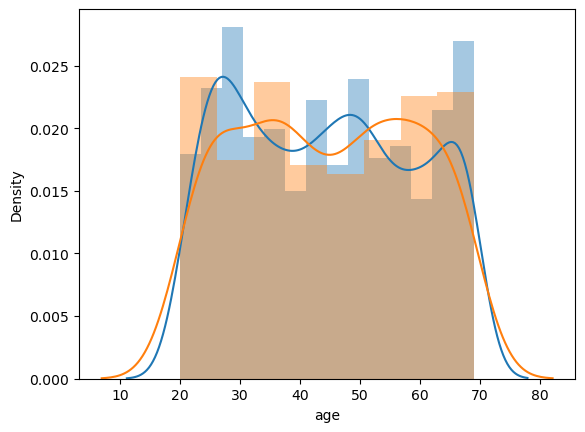

In [18]:
sns.distplot(data.query('premium == False').age)
sns.distplot(data.query('premium == True').age)


In [19]:

succ_bookings = logs.query('success==True').groupby('client', as_index=False).agg({'success':'count'})

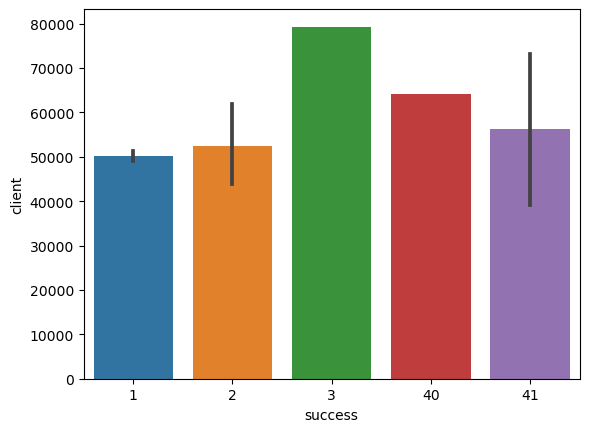

In [20]:
ax = sns.barplot(  x = succ_bookings.success, y = succ_bookings.client, data = logs ) 

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, по оси y – число успешных операций. 

In [21]:
data

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [22]:
user_age_by_platform = data\
    .query("success == True & platform == 'computer'")\
    .groupby(['platform','age'], as_index=False)\
    .agg({'success':'sum'}, ascending = False)\
    .sort_values('success', ascending = False)


In [23]:
user_age_by_platform

,platform,age,success
8,computer,28,49
29,computer,49,33
5,computer,25,33
12,computer,32,27
48,computer,68,26
4,computer,24,26
49,computer,69,24
45,computer,65,23
32,computer,52,22
34,computer,54,22


In [24]:
import matplotlib.pyplot as plt

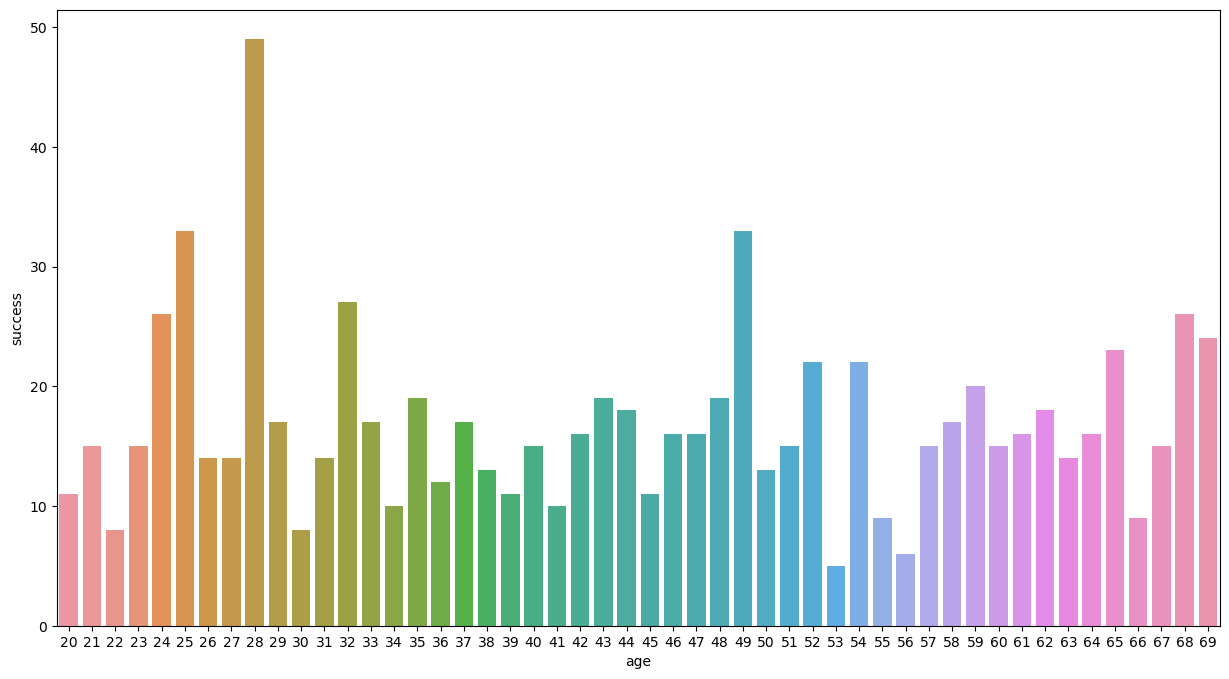

In [25]:
plt.figure(figsize=(15,8))
ax = sns.barplot( x = user_age_by_platform.age, y = user_age_by_platform.success, data = user_age_by_platform) 